In [ ]:
import pandas as pd
df = pd.read_csv("corona_tested_006.csv", error_bad_lines=False)


<ipython-input-1-4bcc5fa2aae0>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("corona_tested_006.csv", error_bad_lines=False)
<ipython-input-1-4bcc5fa2aae0>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("corona_tested_006.csv", error_bad_lines=False)


**QUESTIONS TO TAKE INTO CONSIDERATION BEFORE CONDUCTING HYPOTHESIS**


1. How big is the data?

In [ ]:
df.shape

(255668, 11)

2. How does the data look?

In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
df.sample(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
276254,276255,30-04-2020,False,False,False,False,False,negative,None,male,Other
108411,108412,06-04-2020,FALSE,FALSE,False,False,False,positive,No,male,Contact with confirmed
152105,152106,14-04-2020,False,False,False,False,False,negative,No,female,Other
232860,232861,23-04-2020,False,False,False,False,False,negative,None,female,Other
269090,269091,29-04-2020,True,False,False,False,False,negative,None,male,Other


3. What is the datatype of columns?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df["Sex"].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

4. Are there any missing values?

In [ ]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

5. How does the data look mathematically?

In [ ]:
df.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


6. Are there any duplicate values?

In [ ]:
df.duplicated().sum()

0

7. How is the correlation between columns?

In [ ]:
df.corr()

<ipython-input-2-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Ind_ID
Ind_ID,1.0


In [ ]:
df = df[(df["Cough_symptoms"] != "None") & (df["Fever"] != "None") & (df["Sore_throat"] != "None") & (df["Shortness_of_breath"] != "None") & (df["Headache"] != "None") & (df["Sex"] != "None") & (df["Corona"]!="other")]


In [ ]:
df['Age_60_above'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Age_60_above'].isna().sum()

0

In [ ]:
df['Age_60_above'].value_counts()

No     231967
Yes     23701
Name: Age_60_above, dtype: int64

In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
df['Age_60_above'] = df['Age_60_above'].replace('None', 'Unknown')


In [ ]:
df['Age_60_above'].fillna(df['Age_60_above'].mode()[0], inplace=True)


In [ ]:
df['Sex'].isna().sum()

0

In [ ]:
df['Sex'].value_counts()

female    128413
male      127255
Name: Sex, dtype: int64

In [ ]:
df['Known_contact'].unique()

array(['Abroad', 'Unknown', 'Contact with confirmed'], dtype=object)

In [ ]:
df['Known_contact'].value_counts()

Unknown                   222766
Abroad                     23309
Contact with confirmed      9593
Name: Known_contact, dtype: int64

In [ ]:
df['Known_contact']=df['Known_contact'].replace('Other','Unknown')

In [ ]:
df['Cough_symptoms'].value_counts()

False    216616
True      39052
Name: Cough_symptoms, dtype: int64

In [ ]:
# Assuming 'Cough_symptoms' is the original column name
df['Cough_symptoms'] = df['Cough_symptoms'].apply(lambda x: 'True' if x == 'TRUE' else 'False' if x == 'FALSE' else x)
df['Cough_symptoms'] = df['Cough_symptoms'].astype(str).str.strip()


In [ ]:
df['Fever'].value_counts()

False    235814
True      19854
Name: Fever, dtype: int64

In [ ]:
df['Fever']=df['Fever'].apply(lambda x: 'True' if x=='TRUE' else 'False' if x=='FALSE' else x)
df['Fever']=df['Fever'].astype(str).str.strip()

In [ ]:
df['Sore_throat'].value_counts()

False    254172
True       1496
Name: Sore_throat, dtype: int64

In [ ]:
df['Sore_throat']=df['Sore_throat'].apply(lambda x: 'True' if x=='TRUE' else 'False' if x=='FALSE' else x)
df['Sore_throat']=df['Sore_throat'].astype(str).str.strip()

In [ ]:
df['Shortness_of_breath'].value_counts()

False    254590
True       1078
Name: Shortness_of_breath, dtype: int64

In [ ]:
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: 'True' if x=='TRUE' else 'False' if x=='FALSE' else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].astype(str).str.strip()

In [ ]:
df['Headache'].value_counts()

False    253565
True       2103
Name: Headache, dtype: int64

In [ ]:
df['Headache']=df['Headache'].apply(lambda x:'True' if x=='TRUE' else 'False' if x=='FALSE' else x )
df['Headache']=df['Headache'].astype(str).str.strip()

In [ ]:
df['Corona'].value_counts()

negative    242136
positive     13532
Name: Corona, dtype: int64

**COUNTPLOT**

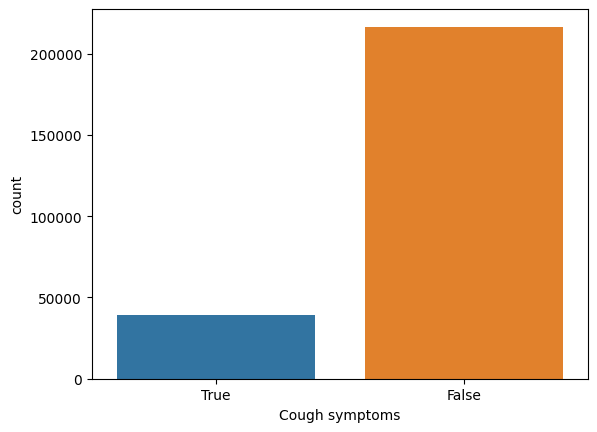

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='Cough_symptoms')
plt.xlabel('Cough symptoms')
plt.ylabel('count')
plt.show()

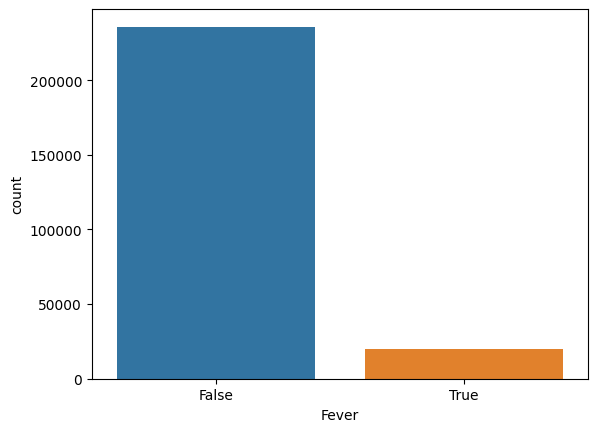

In [ ]:
sns.countplot(data=df,x='Fever')
plt.xlabel('Fever')
plt.ylabel('count')
plt.show()

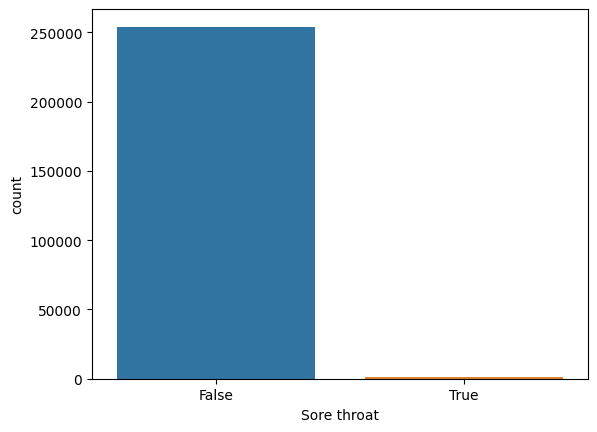

In [ ]:
sns.countplot(data=df,x='Sore_throat')
plt.xlabel('Sore throat')
plt.ylabel('count')
plt.show()

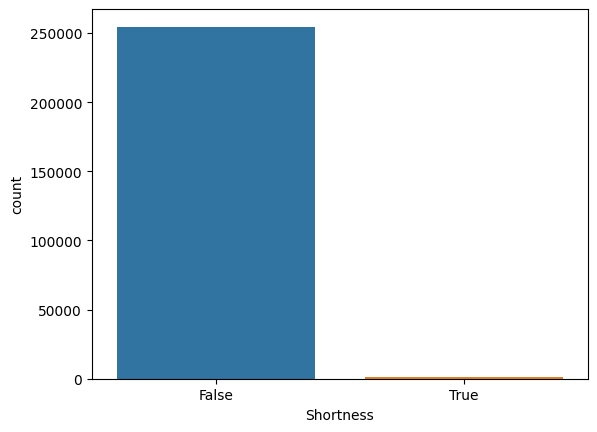

In [ ]:
sns.countplot(data=df,x='Shortness_of_breath')
plt.xlabel('Shortness')
plt.ylabel('count')
plt.show()

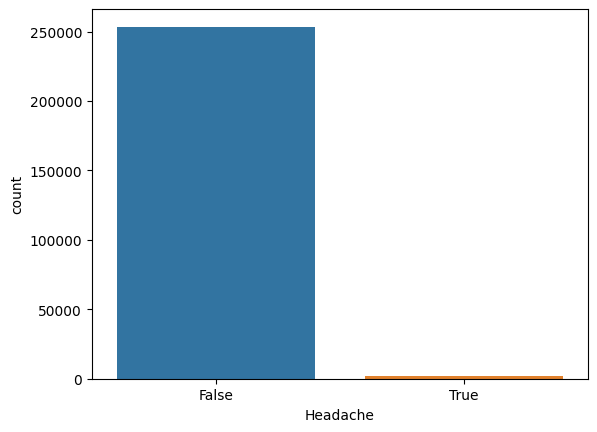

In [ ]:
sns.countplot(data=df,x='Headache')
plt.xlabel('Headache')
plt.ylabel('count')
plt.show()

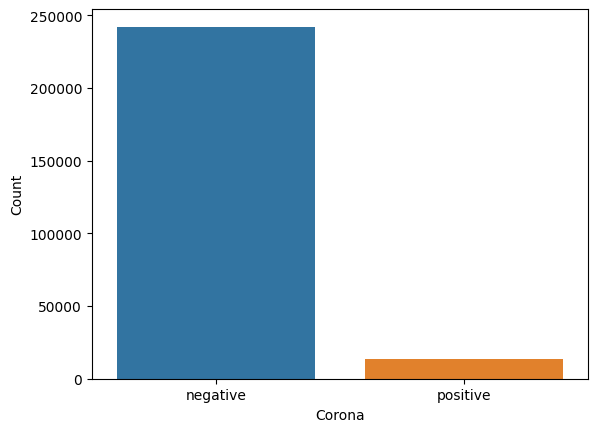

In [ ]:
sns.countplot(data=df,x='Corona')
plt.xlabel("Corona")
plt.ylabel("Count")
plt.show()

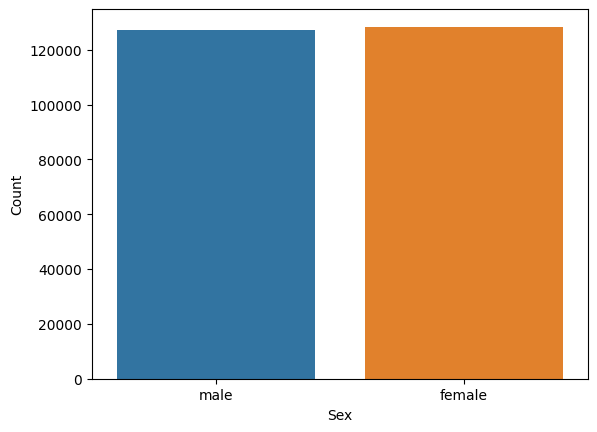

In [ ]:
sns.countplot(data=df,x='Sex')
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

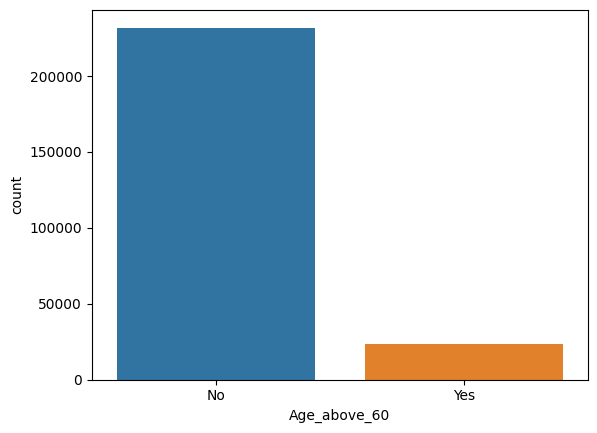

In [ ]:
sns.countplot(data=df,x='Age_60_above')
plt.xlabel("Age_above_60")
plt.ylabel("count")
plt.show()

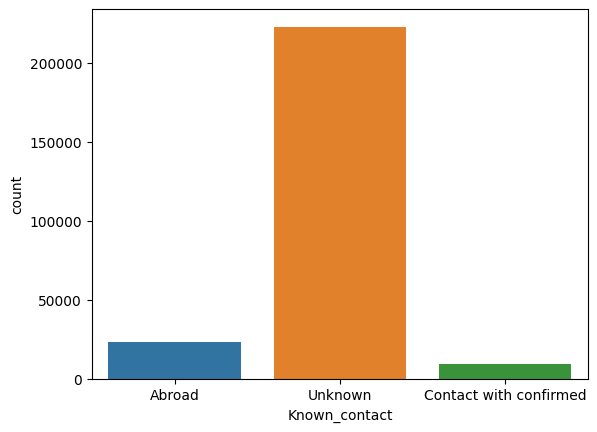

In [ ]:
sns.countplot(data=df,x='Known_contact')
plt.xlabel("Known_contact")
plt.ylabel("count")
plt.show()

<Axes: ylabel='Cough_symptoms'>

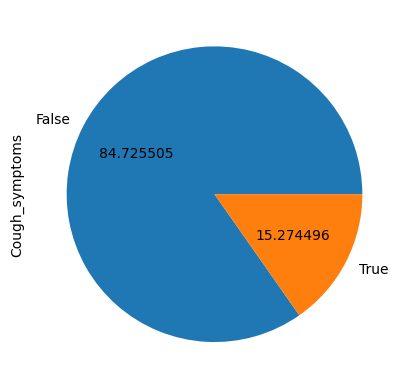

In [ ]:
df['Cough_symptoms'].value_counts().plot(kind='pie',autopct='%2f')

<Axes: ylabel='Fever'>

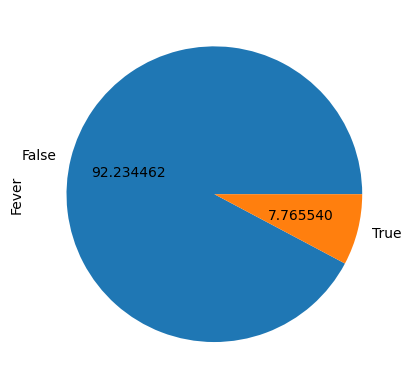

In [ ]:
df['Fever'].value_counts().plot(kind='pie',autopct='%2f')


<Axes: ylabel='Sore_throat'>

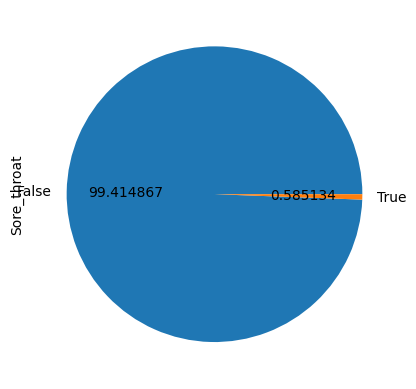

In [ ]:
df['Sore_throat'].value_counts().plot(kind='pie',autopct='%2f')

<Axes: ylabel='Shortness_of_breath'>

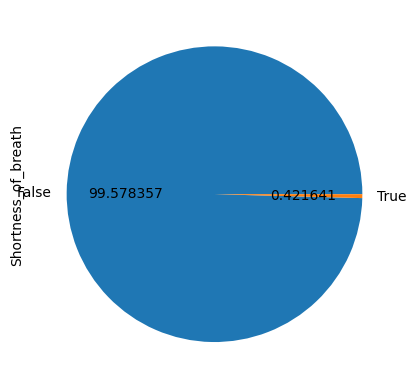

In [ ]:
df['Shortness_of_breath'].value_counts().plot(kind='pie',autopct='%2f')

<Axes: ylabel='Headache'>

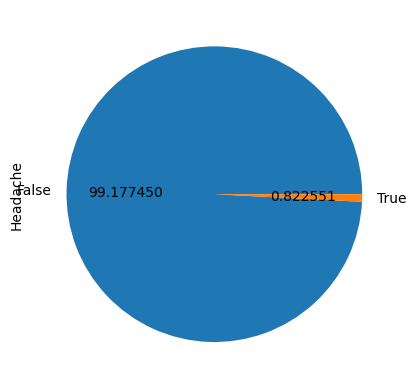

In [ ]:
df['Headache'].value_counts().plot(kind='pie',autopct='%2f')

<Axes: ylabel='Corona'>

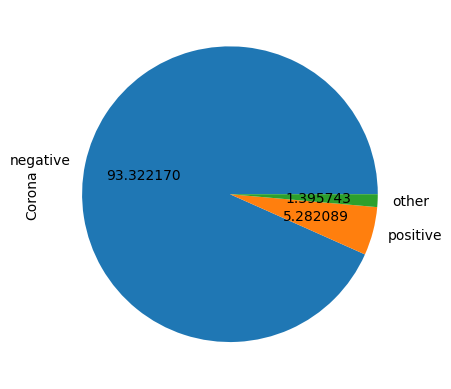

In [ ]:
df['Corona'].value_counts().plot(kind='pie',autopct='%2f')

<Axes: ylabel='Age_60_above'>

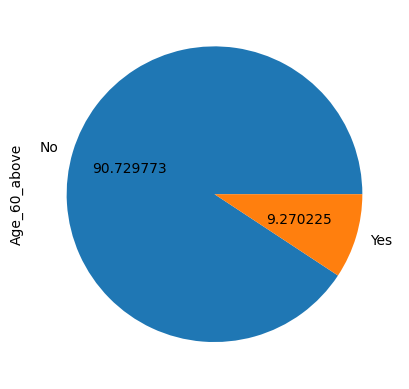

In [ ]:
df['Age_60_above'].value_counts().plot(kind='pie',autopct='%2f')

<Axes: ylabel='Sex'>

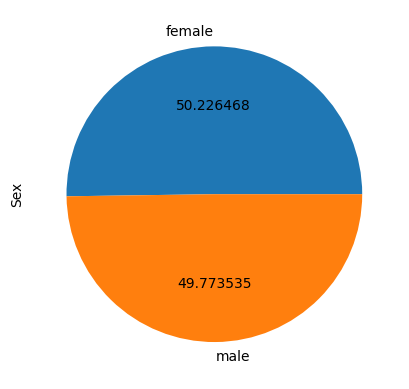

In [ ]:
df['Sex'].value_counts().plot(kind='pie',autopct='%2f')

<Axes: ylabel='Known_contact'>

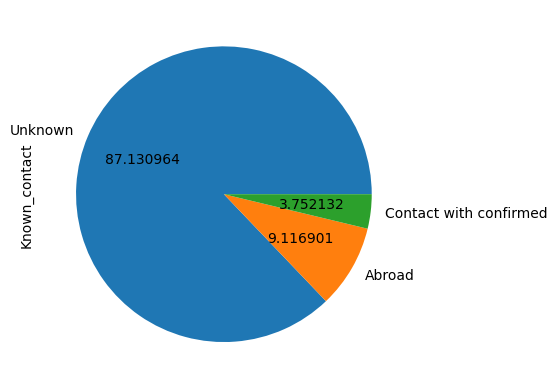

In [ ]:
df['Known_contact'].value_counts().plot(kind='pie',autopct='%2f')

<Axes: xlabel='Corona', ylabel='Sex'>

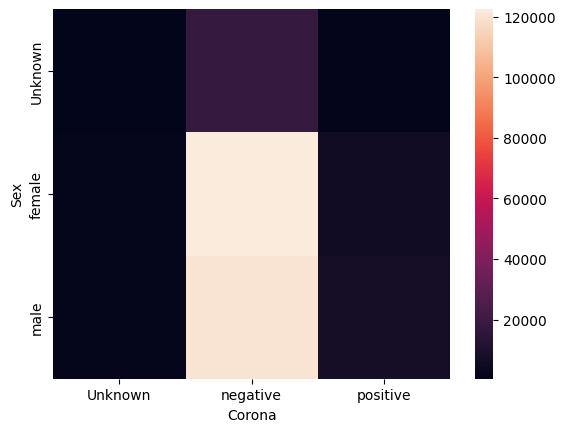

In [ ]:
import pandas as pd
import seaborn as sns
sns.heatmap(pd.crosstab(df['Sex'],df['Corona']))

<Axes: xlabel='Corona', ylabel='Age_60_above'>

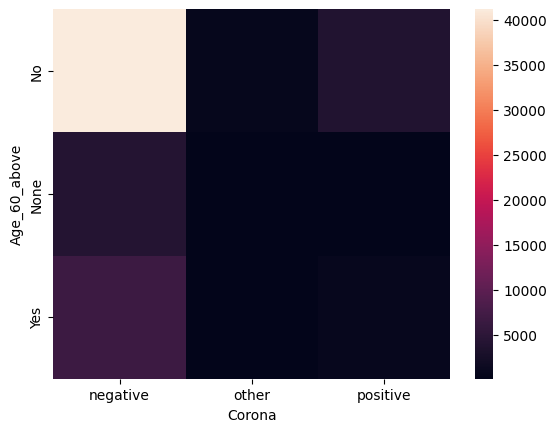

In [ ]:
sns.heatmap(pd.crosstab(df['Age_60_above'],df['Corona']))

<Axes: xlabel='Sex', ylabel='Age_60_above'>

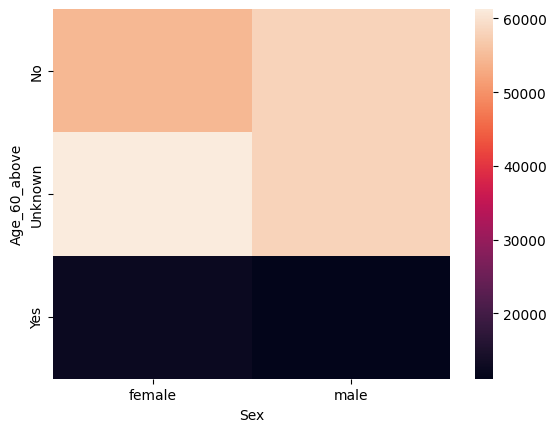

In [ ]:
sns.heatmap(pd.crosstab(df['Age_60_above'],df['Sex']))

In [ ]:


# Columns to one-hot encode
columns_to_encode = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Apply one-hot encoding to the selected columns
df_encoded = pd.get_dummies(df, columns=df.columns[columns_to_encode])


In [ ]:
df_encoded.head()

,Ind_ID,Test_date,Cough_symptoms_False,Cough_symptoms_True,Fever_False,Fever_True,Sore_throat_False,Sore_throat_True,Shortness_of_breath_False,Shortness_of_breath_True,...,Headache_True,Corona_negative,Corona_positive,Age_60_above_No,Age_60_above_Yes,Sex_female,Sex_male,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Unknown
13727,13728,22-03-2020,0,1,1,0,1,0,1,0,...,0,1,0,1,0,0,1,1,0,0
13728,13729,22-03-2020,0,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0
13730,13731,22-03-2020,0,1,0,1,1,0,1,0,...,0,0,1,0,1,1,0,0,0,1
13734,13735,22-03-2020,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1
13735,13736,22-03-2020,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X=df_encoded.iloc[:,[2,3,4,5,6,8,9,10]]
y=df_encoded.iloc[:,7]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

,Cough_symptoms_False,Cough_symptoms_True,Fever_False,Fever_True,Sore_throat_False,Shortness_of_breath_False,Shortness_of_breath_True,Headache_False
122436,1,0,1,0,1,1,0,1
37846,1,0,1,0,1,1,0,1
88029,1,0,1,0,1,1,0,1
55515,1,0,1,0,1,1,0,1
45101,1,0,1,0,1,1,0,1


In [ ]:
y_train.head()

122436    0
37846     0
88029     0
55515     0
45101     0
Name: Sore_throat_True, dtype: uint8

In [ ]:
X_test.head()

,Cough_symptoms_False,Cough_symptoms_True,Fever_False,Fever_True,Sore_throat_False,Shortness_of_breath_False,Shortness_of_breath_True,Headache_False
38201,1,0,1,0,1,1,0,1
70572,1,0,1,0,1,0,1,1
17562,1,0,1,0,1,1,0,1
211852,1,0,1,0,1,1,0,1
207379,1,0,1,0,1,1,0,1


In [ ]:
y_test.head()

38201     0
70572     0
17562     0
211852    0
207379    0
Name: Sore_throat_True, dtype: uint8

In [ ]:
# Assuming your target variable is 'Corona' in your DataFrame
# Check for missing values in the target variable
missing_values = df_encoded['Corona'].isnull().sum()

if missing_values > 0:
    print("There are missing values in the target variable.")
else:
    print("There are no missing values in the target variable.")


There are no missing values in the target variable.


In [ ]:
# Assuming your target variable is 'Corona' in your DataFrame
# Check for any extra characters or whitespaces in the target variable labels
extra_characters = df_encoded['Corona'].str.contains(r'[^\w\s]').any()

if extra_characters:
    print("The target variable contains extra characters or whitespaces.")
else:
    print("The target variable labels are clean and do not contain extra characters or whitespaces.")


The target variable labels are clean and do not contain extra characters or whitespaces.


In [ ]:
y_train.dtypes

dtype('uint8')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Assume you have already loaded your dataframe 'df'

# Separate your features (X) and target variable (y)
X1 = df_encoded.iloc[:, [2, 3, 4, 5, 6, 8, 10]]
y1 = df_encoded.iloc[:, 7]

# Create an instance of the SMOTE oversampler
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE oversampling to the X1 features
X_oversampled, y_oversampled = smote.fit_resample(X1, y1)

# Extract the original 9th index column
X_original_9th_index = df_encoded.iloc[:, 9]

# Concatenate the oversampled data with the original 9th index column
X_combined = pd.concat([X_oversampled, X_original_9th_index], axis=1)

# Create an imputer to replace missing values with the most frequent value
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Create a pipeline with the imputer and the random forest classifier
pipeline = Pipeline([('imputer', imputer), ('rf_clf', RandomForestClassifier())])

# Fit the pipeline using the combined data
pipeline.fit(X_combined, y_oversampled)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('rf_clf', RandomForestClassifier())])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_oversampled, test_size=0.25, random_state=42)

# Fit the pipeline on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_oversampled, test_size=0.25, random_state=42)

# Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Fit the classifier on the training set
xgb_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [ ]:
y_pred = clf.predict(X_test)


ValueError: ignored

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50847
           1       1.00      1.00      1.00       287

    accuracy                           1.00     51134
   macro avg       1.00      1.00      1.00     51134
weighted avg       1.00      1.00      1.00     51134

